# Задание взято с [платформы](https://karpov.courses/)

Вы работаете аналитиком в приложении для онлайн-знакомств. Механика приложения следующая: пользователи видят в приложении анкеты друг друга и могут ставить друг другу лайки или дизлайки. Если пользователи поставили друг другу лайк – это называется мэтч, и у пользователей появляется возможность познакомиться.

Команда приложения разработала новый алгоритм для поиска наиболее подходящих анкет. Для проверки работы алгоритма был проведен АБ-тест. Все пользователи были разделены на две группы. Пользователи в группе с номером 0 пользовались приложением со старым алгоритмом. Все пользователи в группе 1 пользовались приложением с новым алгоритмом для поиска анкет.

Ваша задача – оценить, правда ли, что новый алгоритм улучшил качество сервиса. Для этого нужно выбрать метрики, которые отвечают за качество сервиса, и статистически сравнить эти метрики в двух группах.

В данных находится выгрузка логов взаимодействия пользователей друг с другом. Для каждой пары пользователей указано, из какой они группы АБ-теста и случился ли у них мэтч.

Результат вашей работы – аналитическое заключение с ответом на вопрос, стоит ли включать новую систему поиска анкет на всех пользователей.

Для начала импортируем библиотеки

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

Посмотрим на данные, пропущенные значения и количество наблюдений в выборках

In [3]:
df = pd.read_csv('dating_data.csv')
df.head()

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1


In [4]:
df.shape

(14514, 4)

In [5]:
df.isna().sum()

user_id_1    0
user_id_2    0
group        0
is_match     0
dtype: int64

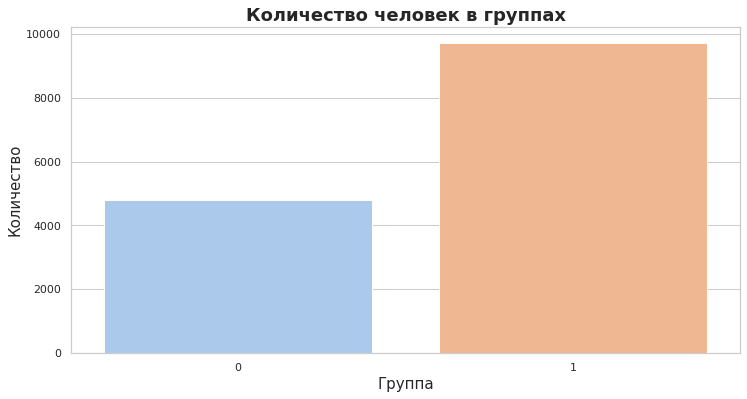

In [6]:
ax = sns.countplot(data=df, x='group', palette='pastel')
ax.set_title('Количество человек в группах', fontsize = 18, fontweight='bold' )
ax.set_xlabel('Группа', fontsize = 15)
ax.set_ylabel('Количество', fontsize = 15);


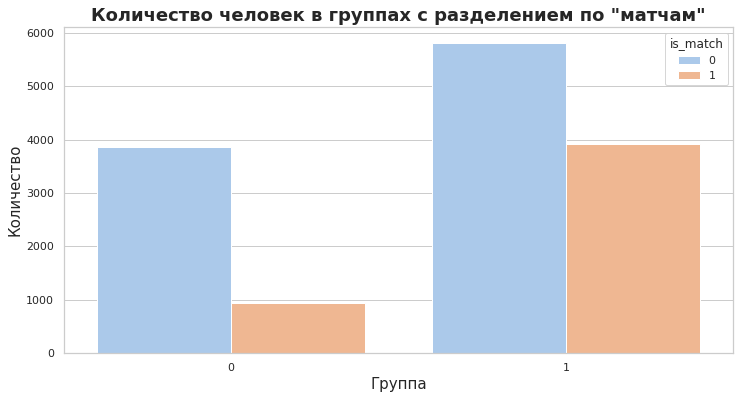

In [7]:
ax = sns.countplot(data=df, x='group', hue='is_match',  palette='pastel')
ax.set_title('Количество человек в группах с разделением по "матчам"', fontsize = 18, fontweight='bold' )
ax.set_xlabel('Группа', fontsize = 15)
ax.set_ylabel('Количество', fontsize = 15);

На первый взгляд по графикам есть дисбаланс групп, при этом в группе 1 имеется больше "матчей". Для проверки гипотезы о том, что различий между группами нет, будем использовать критерий $\chi^2$.


In [20]:
from scipy.stats import chi2_contingency

df_group0 = df.query('group == 0')
df_group1 = df.query('group == 1')

obs = [len(df_group1.query('is_match == 0')), len(df_group1.query('is_match == 1'))]
exp = [len(df_group0.query('is_match == 0')), len(df_group0.query('is_match == 1'))]

chi, p_value, _,_ = chi2_contingency(((obs[0], exp[0]), (obs[1], exp[1])))

p_value

1.4418299163662586e-136

Так как p-value получилось меньше 0,05, то имеем статистически значимое различие между группами и стоит включить новую систему поиска анкет на всех пользователей.